In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
all_features = ["text_ tokens", "hashtags", "tweet_id", "present_media", "present_links", "present_domains",\
                "tweet_type","language", "tweet_timestamp", "enaged_with_user_id", "engaged_with_user_follower_count",\
               "engaged_with_user_following_count", "engaged_with_user_is_verified", "engaged_with_user_account_creation",\
               "enaging_user_id", "enaging_user_follower_count", "enaging_user_following_count", "enaging_user_is_verified",\
               "enaging_user_account_creation", "engagee_follows_engager", "reply_timestamp", "retweet_timestamp",\
                "retweet_with_comment_timestamp", "like_timestamp"]
training = pd.read_csv('s3://recsys-challenge-2020/training.tsv', encoding="utf-8", names = all_features, sep="\x01", nrows = 1000000)

In [41]:
training

,text_ tokens,hashtags,tweet_id,present_media,present_links,present_domains,tweet_type,language,tweet_timestamp,enaged_with_user_id,...,enaging_user_id,enaging_user_follower_count,enaging_user_following_count,enaging_user_is_verified,enaging_user_account_creation,engagee_follows_engager,reply_timestamp,retweet_timestamp,retweet_with_comment_timestamp,like_timestamp
0,101\t6417\t3410\t3398\t3184\t1909\t56910\t1683...,NaN,D4D1EBDE74F74C5DA529959AF979625C,NaN,NaN,NaN,TopLevel,22C448FF81263D4BAF2A176145EE9EAD,1581258144,D7EFC6D19CFB09B9A1CE4C4B0E0091F6,...,0000006C3074607050F1339DDCB890BB,27428,600,False,1520948869,False,NaN,NaN,NaN,NaN
1,101\t14120\t131\t120\t120\t188\t119\t11170\t12...,NaN,BFB529DAB6D384EB83E899A72AB3830D,Photo,NaN,NaN,TopLevel,B9175601E87101A984A50F8A62A1C374,1581018910,1F30A85E612A24B426013978ADB7AE46,...,000005C520010F8917EEAB6F5B6EC1C4,17,77,False,1569692352,True,NaN,NaN,NaN,NaN
2,101\t62342\t10858\t54439\t19571\t22480\t7831\t...,NaN,519078C7834E9642508F72A6C2D0F3B7,NaN,788ABAA22F1C4A9D186510C1E3E81F58,892B6E0BC037800B59112CFCB95E3301,TopLevel,22C448FF81263D4BAF2A176145EE9EAD,1581244866,9E1FD934C376903895DEEBCC0F6AB920,...,000006829BEADA9EEA695CF0C334B426,2,29,False,1568107028,False,NaN,NaN,NaN,1.581247e+09
3,101\t58955\t10898\t103305\t1901\t16181\t7168\t...,F0F2FBE57F08E7C4326682B5EDA63E3E\tE78674D32346...,52AAE9E33EFAC8C478C57B31A9E31ED1,NaN,C06B84A10A75AE4BF4A102AB45CC2ABF,C0F5328C1D36CD4B34D1808012E18D46,TopLevel,22C448FF81263D4BAF2A176145EE9EAD,1581250124,BEB3C337B266E2C4769065AD64724329,...,000006829BEADA9EEA695CF0C334B426,3,30,False,1568107028,False,NaN,NaN,NaN,NaN
4,101\t2435\t5656\t2594\t8279\t8623\t1925\t64126...,NaN,89C1298C55EB3D68E2784F0BFB69E6F8,NaN,NaN,NaN,TopLevel,22C448FF81263D4BAF2A176145EE9EAD,1580958805,9E1FD934C376903895DEEBCC0F6AB920,...,000006829BEADA9EEA695CF0C334B426,3,30,False,1568107028,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,101\t56898\t137\t14325\t10371\t10738\t24813\t1...,NaN,AF66180E09613048A06693E1DA25F3D5,NaN,NaN,NaN,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581022874,29B8298441C2D4E5D1AEC50D7BEF3712,...,0DD2A774F7679AD1FD5912173D3760FC,90,129,False,1528034964,True,NaN,NaN,NaN,NaN
999996,101\t56898\t137\t33787\t11403\t23315\t25905\t1...,NaN,4C83E289F6668FCF6B4ABF223769D7A8,Video,NaN,NaN,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581474785,AD68074E50E59657A5822ED32C87897A,...,0DD2A7E8AEF35BD0EB83FFA4504F2075,193,190,False,1242418375,False,NaN,NaN,NaN,NaN
999997,101\t10117\t11545\t13646\t75877\t70615\t14120\...,NaN,E05A382AEFE3F44518C98233CF439784,Photo,NaN,NaN,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581545832,790D519ED5D869AB368026BBAD8BB5CF,...,0DD2A82452C83CD3F825E73498EBD1DE,13,37,False,1507734862,False,NaN,NaN,NaN,NaN
999998,101\t56898\t137\t41626\t168\t178\t10147\t131\t...,NaN,7F6D93DF58E7B05DD51A81A99A0D6C65,Photo\tPhoto,NaN,NaN,Retweet,125C57F4FA6D4E110983FB11B52EFD4E,1581260734,08AA7A7638F95B19CFC170588DE73F04,...,0DD2A83B6837B1FA23CEA85748175A46,95,354,False,1348229207,False,NaN,1.581267e+09,NaN,NaN


In [45]:
training['retweet_with_comment_bool'] = training.retweet_with_comment_timestamp.fillna(0)
training.loc[training.retweet_with_comment_bool != 0.0, 'retweet_with_comment_bool'] = 1.0

In [47]:
(training.retweet_with_comment_bool == 1.0).sum()

7750

In [48]:
training.columns

Index(['text_ tokens', 'hashtags', 'tweet_id', 'present_media',
       'present_links', 'present_domains', 'tweet_type', 'language',
       'tweet_timestamp', 'enaged_with_user_id',
       'engaged_with_user_follower_count', 'engaged_with_user_following_count',
       'engaged_with_user_is_verified', 'engaged_with_user_account_creation',
       'enaging_user_id', 'enaging_user_follower_count',
       'enaging_user_following_count', 'enaging_user_is_verified',
       'enaging_user_account_creation', 'engagee_follows_engager',
       'reply_timestamp', 'retweet_timestamp',
       'retweet_with_comment_timestamp', 'like_timestamp',
       'present_links_bool', 'retweet_with_comment_bool'],
      dtype='object')

In [49]:
cnames_numerical = list(training.select_dtypes(exclude=['object', 'bool']).columns)

In [50]:
cnames_numerical

['tweet_timestamp',
 'engaged_with_user_follower_count',
 'engaged_with_user_following_count',
 'engaged_with_user_account_creation',
 'enaging_user_follower_count',
 'enaging_user_following_count',
 'enaging_user_account_creation',
 'reply_timestamp',
 'retweet_timestamp',
 'retweet_with_comment_timestamp',
 'like_timestamp',
 'retweet_with_comment_bool']

In [51]:
training_subset_columns = training[cnames_numerical].drop(['tweet_timestamp', 'engaged_with_user_account_creation',\
        'enaging_user_account_creation', 'reply_timestamp', 'retweet_timestamp', 'like_timestamp', 'retweet_with_comment_timestamp'], axis = 1)

In [52]:
training_subset_columns

,engaged_with_user_follower_count,engaged_with_user_following_count,enaging_user_follower_count,enaging_user_following_count,retweet_with_comment_bool
0,3517,590,27428,600,0.0
1,39786,32978,17,77,0.0
2,141726,3232,2,29,0.0
3,3044,99,3,30,0.0
4,141370,3235,3,30,0.0
...,...,...,...,...,...
999995,8650,8515,90,129,0.0
999996,77103,1028,193,190,0.0
999997,8448235,75,13,37,0.0
999998,292224,709,95,354,0.0


In [53]:
training_subset_columns = pd.concat([training[['enaging_user_id']], training_subset_columns], axis =1)

In [54]:
positive_training_subset_columns = training_subset_columns[training_subset_columns['retweet_with_comment_bool'] == 1.0]

In [55]:
num_times_engaging_user_did_action = positive_training_subset_columns.groupby(['enaging_user_id']).size().reset_index(name = 'count').sort_values(ascending=False, by = 'count')

In [56]:
num_times_engaging_user_did_action

,enaging_user_id,count
3029,05B78394D6B6F265C9E76EDC5032FC7A,8
1983,03B050855E2AB9813B71DD56BF471B91,5
3119,05E0F3607832FE2E16E5BAD23ADA9B45,5
1954,03A3C5D87327491DEDAEF36D17D82B4E,4
5970,0B05C4A2CA06B95F33EDB1EBD75A5DE0,4
...,...,...
2541,04CBA5949478EF2D47080EC6804FC667,1
2540,04CAB605754EF6803164574CBE93DDAC,1
2539,04C9F3B33083405055063BC4F0BE14B0,1
2538,04C9BAD404E3DBC8D763A3654E1DEA8E,1


In [57]:
training_numerical = pd.merge(training_subset_columns, num_times_engaging_user_did_action, how = 'left', on = 'enaging_user_id')

In [60]:
training_numerical

,enaging_user_id,engaged_with_user_follower_count,engaged_with_user_following_count,enaging_user_follower_count,enaging_user_following_count,retweet_with_comment_bool,count
0,0000006C3074607050F1339DDCB890BB,3517,590,27428,600,0.0,0.0
1,000005C520010F8917EEAB6F5B6EC1C4,39786,32978,17,77,0.0,0.0
2,000006829BEADA9EEA695CF0C334B426,141726,3232,2,29,0.0,0.0
3,000006829BEADA9EEA695CF0C334B426,3044,99,3,30,0.0,0.0
4,000006829BEADA9EEA695CF0C334B426,141370,3235,3,30,0.0,0.0
...,...,...,...,...,...,...,...
999995,0DD2A774F7679AD1FD5912173D3760FC,8650,8515,90,129,0.0,0.0
999996,0DD2A7E8AEF35BD0EB83FFA4504F2075,77103,1028,193,190,0.0,0.0
999997,0DD2A82452C83CD3F825E73498EBD1DE,8448235,75,13,37,0.0,0.0
999998,0DD2A83B6837B1FA23CEA85748175A46,292224,709,95,354,0.0,0.0


In [61]:
training_numerical['count'].value_counts()

0.0    984484
1.0     14524
2.0       855
3.0        68
4.0        33
8.0        21
5.0        15
Name: count, dtype: int64

In [62]:
from sklearn import preprocessing

In [77]:
x_df = training_numerical.drop(['enaging_user_id', 'retweet_with_comment_bool'], axis = 1)
x = x_df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [79]:
x_df

,engaged_with_user_follower_count,engaged_with_user_following_count,enaging_user_follower_count,enaging_user_following_count,count
0,3517,590,27428,600,0.0
1,39786,32978,17,77,0.0
2,141726,3232,2,29,0.0
3,3044,99,3,30,0.0
4,141370,3235,3,30,0.0
...,...,...,...,...,...
999995,8650,8515,90,129,0.0
999996,77103,1028,193,190,0.0
999997,8448235,75,13,37,0.0
999998,292224,709,95,354,0.0


In [78]:
df

,0,1,2,3,4
0,0.000031,0.000133,2.787279e-03,0.001195,0.0
1,0.000353,0.007416,1.727568e-06,0.000152,0.0
2,0.001257,0.000727,2.032433e-07,0.000056,0.0
3,0.000027,0.000022,3.048650e-07,0.000058,0.0
4,0.001253,0.000727,3.048650e-07,0.000058,0.0
...,...,...,...,...,...
999995,0.000077,0.001915,9.145950e-06,0.000255,0.0
999996,0.000684,0.000231,1.961298e-05,0.000377,0.0
999997,0.074904,0.000017,1.321082e-06,0.000072,0.0
999998,0.002591,0.000159,9.654059e-06,0.000704,0.0


In [ ]:
training_subset = training[['present_media', 'present_links', 'present_domains', 'tweet_type', 'language',\
                     'enaged_with_user_id', 'engaged_with_user_is_verified', 'enaging_user_id',\
                    'enaging_user_is_verified', 'engagee_follows_engager', 'present_links_bool', 'retweet_with_comment_bool']]

In [ ]:
training_subset

In [70]:
# X = training_numerical.drop(['retweet_with_comment_bool'], axis = 1)
y = training_numerical[['retweet_with_comment_bool']]

In [71]:
training_data = pd.concat([df, y], axis =1)

In [76]:
training_numerical.head()

,enaging_user_id,engaged_with_user_follower_count,engaged_with_user_following_count,enaging_user_follower_count,enaging_user_following_count,retweet_with_comment_bool,count
0,0000006C3074607050F1339DDCB890BB,3517,590,27428,600,0.0,0.0
1,000005C520010F8917EEAB6F5B6EC1C4,39786,32978,17,77,0.0,0.0
2,000006829BEADA9EEA695CF0C334B426,141726,3232,2,29,0.0,0.0
3,000006829BEADA9EEA695CF0C334B426,3044,99,3,30,0.0,0.0
4,000006829BEADA9EEA695CF0C334B426,141370,3235,3,30,0.0,0.0


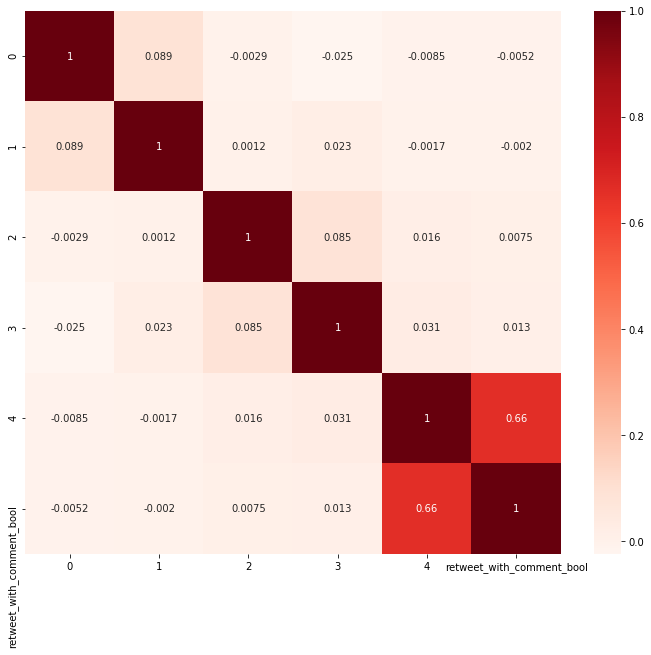

In [75]:
plt.figure(figsize=(12,10))
cor = training_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [72]:
training_data

,0,1,2,3,4,retweet_with_comment_bool
0,0.000031,0.000133,2.787279e-03,0.001195,0.0,0.0
1,0.000353,0.007416,1.727568e-06,0.000152,0.0,0.0
2,0.001257,0.000727,2.032433e-07,0.000056,0.0,0.0
3,0.000027,0.000022,3.048650e-07,0.000058,0.0,0.0
4,0.001253,0.000727,3.048650e-07,0.000058,0.0,0.0
...,...,...,...,...,...,...
999995,0.000077,0.001915,9.145950e-06,0.000255,0.0,0.0
999996,0.000684,0.000231,1.961298e-05,0.000377,0.0,0.0
999997,0.074904,0.000017,1.321082e-06,0.000072,0.0,0.0
999998,0.002591,0.000159,9.654059e-06,0.000704,0.0,0.0


In [ ]:
X.present_links_bool.nunique()

In [ ]:
X

In [ ]:
y

In [ ]:
X = X.fillna('unknown')

In [ ]:
from collections import defaultdict
d = defaultdict(LabelEncoder)
fit = X.apply(lambda x: d[x.name].fit_transform(x))

In [ ]:
fit

In [ ]:
y

In [ ]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(fit, y)

In [ ]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
# pyplot.bar([fit[i] for i in range(len(fs.scores_))], fs.scores_)
# pyplot.show()

In [ ]:
fit.columns[10]

In [ ]:
fit.columns[7]